<a href="https://colab.research.google.com/github/gnbhub/gnb_2022_1_Ai_team2/blob/master/week5/aram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive_path = "/content/"

train = pd.read_csv(drive_path + "movies_train.csv")
test = pd.read_csv(drive_path + "movies_test.csv")
submission = pd.read_csv(drive_path + "submission.csv")

print(train.shape, test.shape, submission.shape)


(600, 12) (243, 11) (243, 2)


In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
train.describe(include='all')

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600,600,600,600,600.000000,600,600,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
unique,600,169,12,330,NaN,4,472,NaN,NaN,NaN,NaN,NaN
top,개들의 전쟁,CJ 엔터테인먼트,드라마,2015-10-22,NaN,청소년 관람불가,홍상수,NaN,NaN,NaN,NaN,NaN
freq,1,54,221,6,NaN,204,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,100.863333,NaN,NaN,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,NaN,NaN,NaN,NaN,18.097528,NaN,NaN,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,89.000000,NaN,NaN,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,NaN,NaN,NaN,NaN,114.000000,NaN,NaN,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05


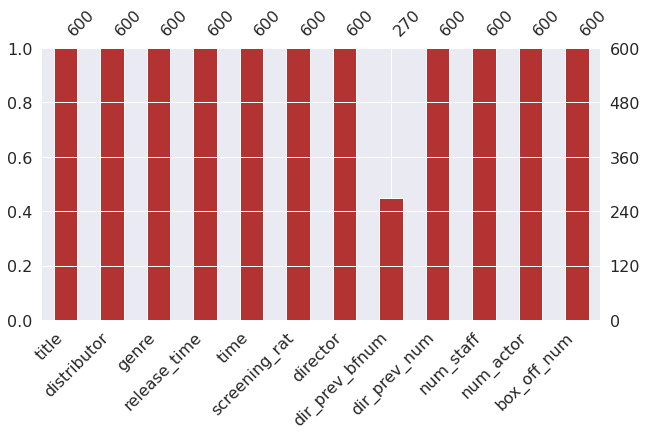

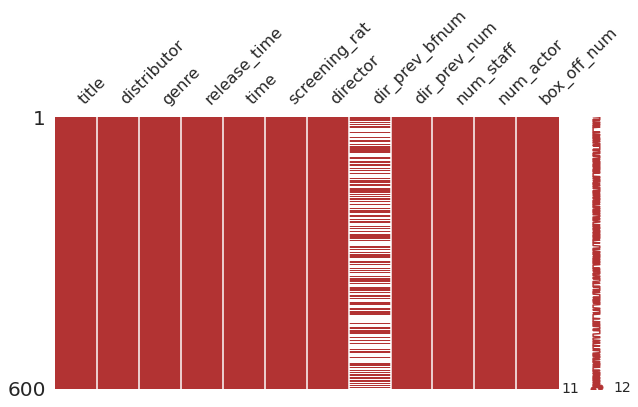

In [ ]:
import missingno as msno
msno.bar(train, figsize=(10, 5), color=(0.7, 0.2, 0.2))
plt.show()

import missingno as msno
msno.matrix(train, figsize=(10, 5), color=(0.7, 0.2, 0.2))
plt.show()

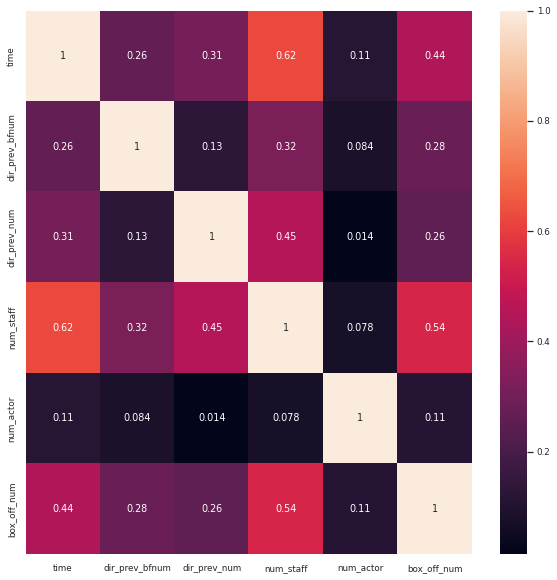

In [ ]:
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(), annot=True, cbar=True);
plt.show()

# time(0.44), num_staff(0.54)가 가장 높은 상관계수를 가짐

In [ ]:
#결측치 많아서 제거
train = train.drop(['dir_prev_bfnum'],axis=1)
test = test.drop(['dir_prev_bfnum'],axis=1)

In [ ]:
#제목은 영향이 없을 것 같으므로 제거
train = train.drop(['title'],axis=1)
test = test.drop(['title'],axis=1)

In [ ]:
train = train.drop(['director'],axis=1)
test = test.drop(['director'],axis=1)

In [ ]:
train.distributor.value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [ ]:
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
  if distributor in distributor_list:
    return distributor
  else:
    return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [ ]:
train.distributor.value_counts()

기타           409
CJ 엔터테인먼트     54
롯데엔터테인먼트      52
(주)NEW        30
(주)마운틴픽쳐스     29
(주)쇼박스        26
Name: distributor, dtype: int64

In [ ]:
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train = train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test = test.drop(['release_time'],axis = 1)

In [ ]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
train_x = train.drop(['box_off_num'],axis=1)
train_y = train['box_off_num']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

RandomForestRegressor()

In [ ]:
pred = model.predict(test)

In [ ]:
submission = pd.read_csv('/content/submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
submission['box_off_num'] = pred

In [ ]:
submission

,title,box_off_num
0,용서는 없다,2434950.56
1,아빠가 여자를 좋아해,1752367.00
2,하모니,1601502.97
3,의형제,1931309.66
4,평행 이론,733243.40
...,...,...
238,해에게서 소년에게,145151.21
239,울보 권투부,3799.28
240,어떤살인,380730.64
241,말하지 못한 비밀,6387.67


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54004 missing from current font.
  font.set_

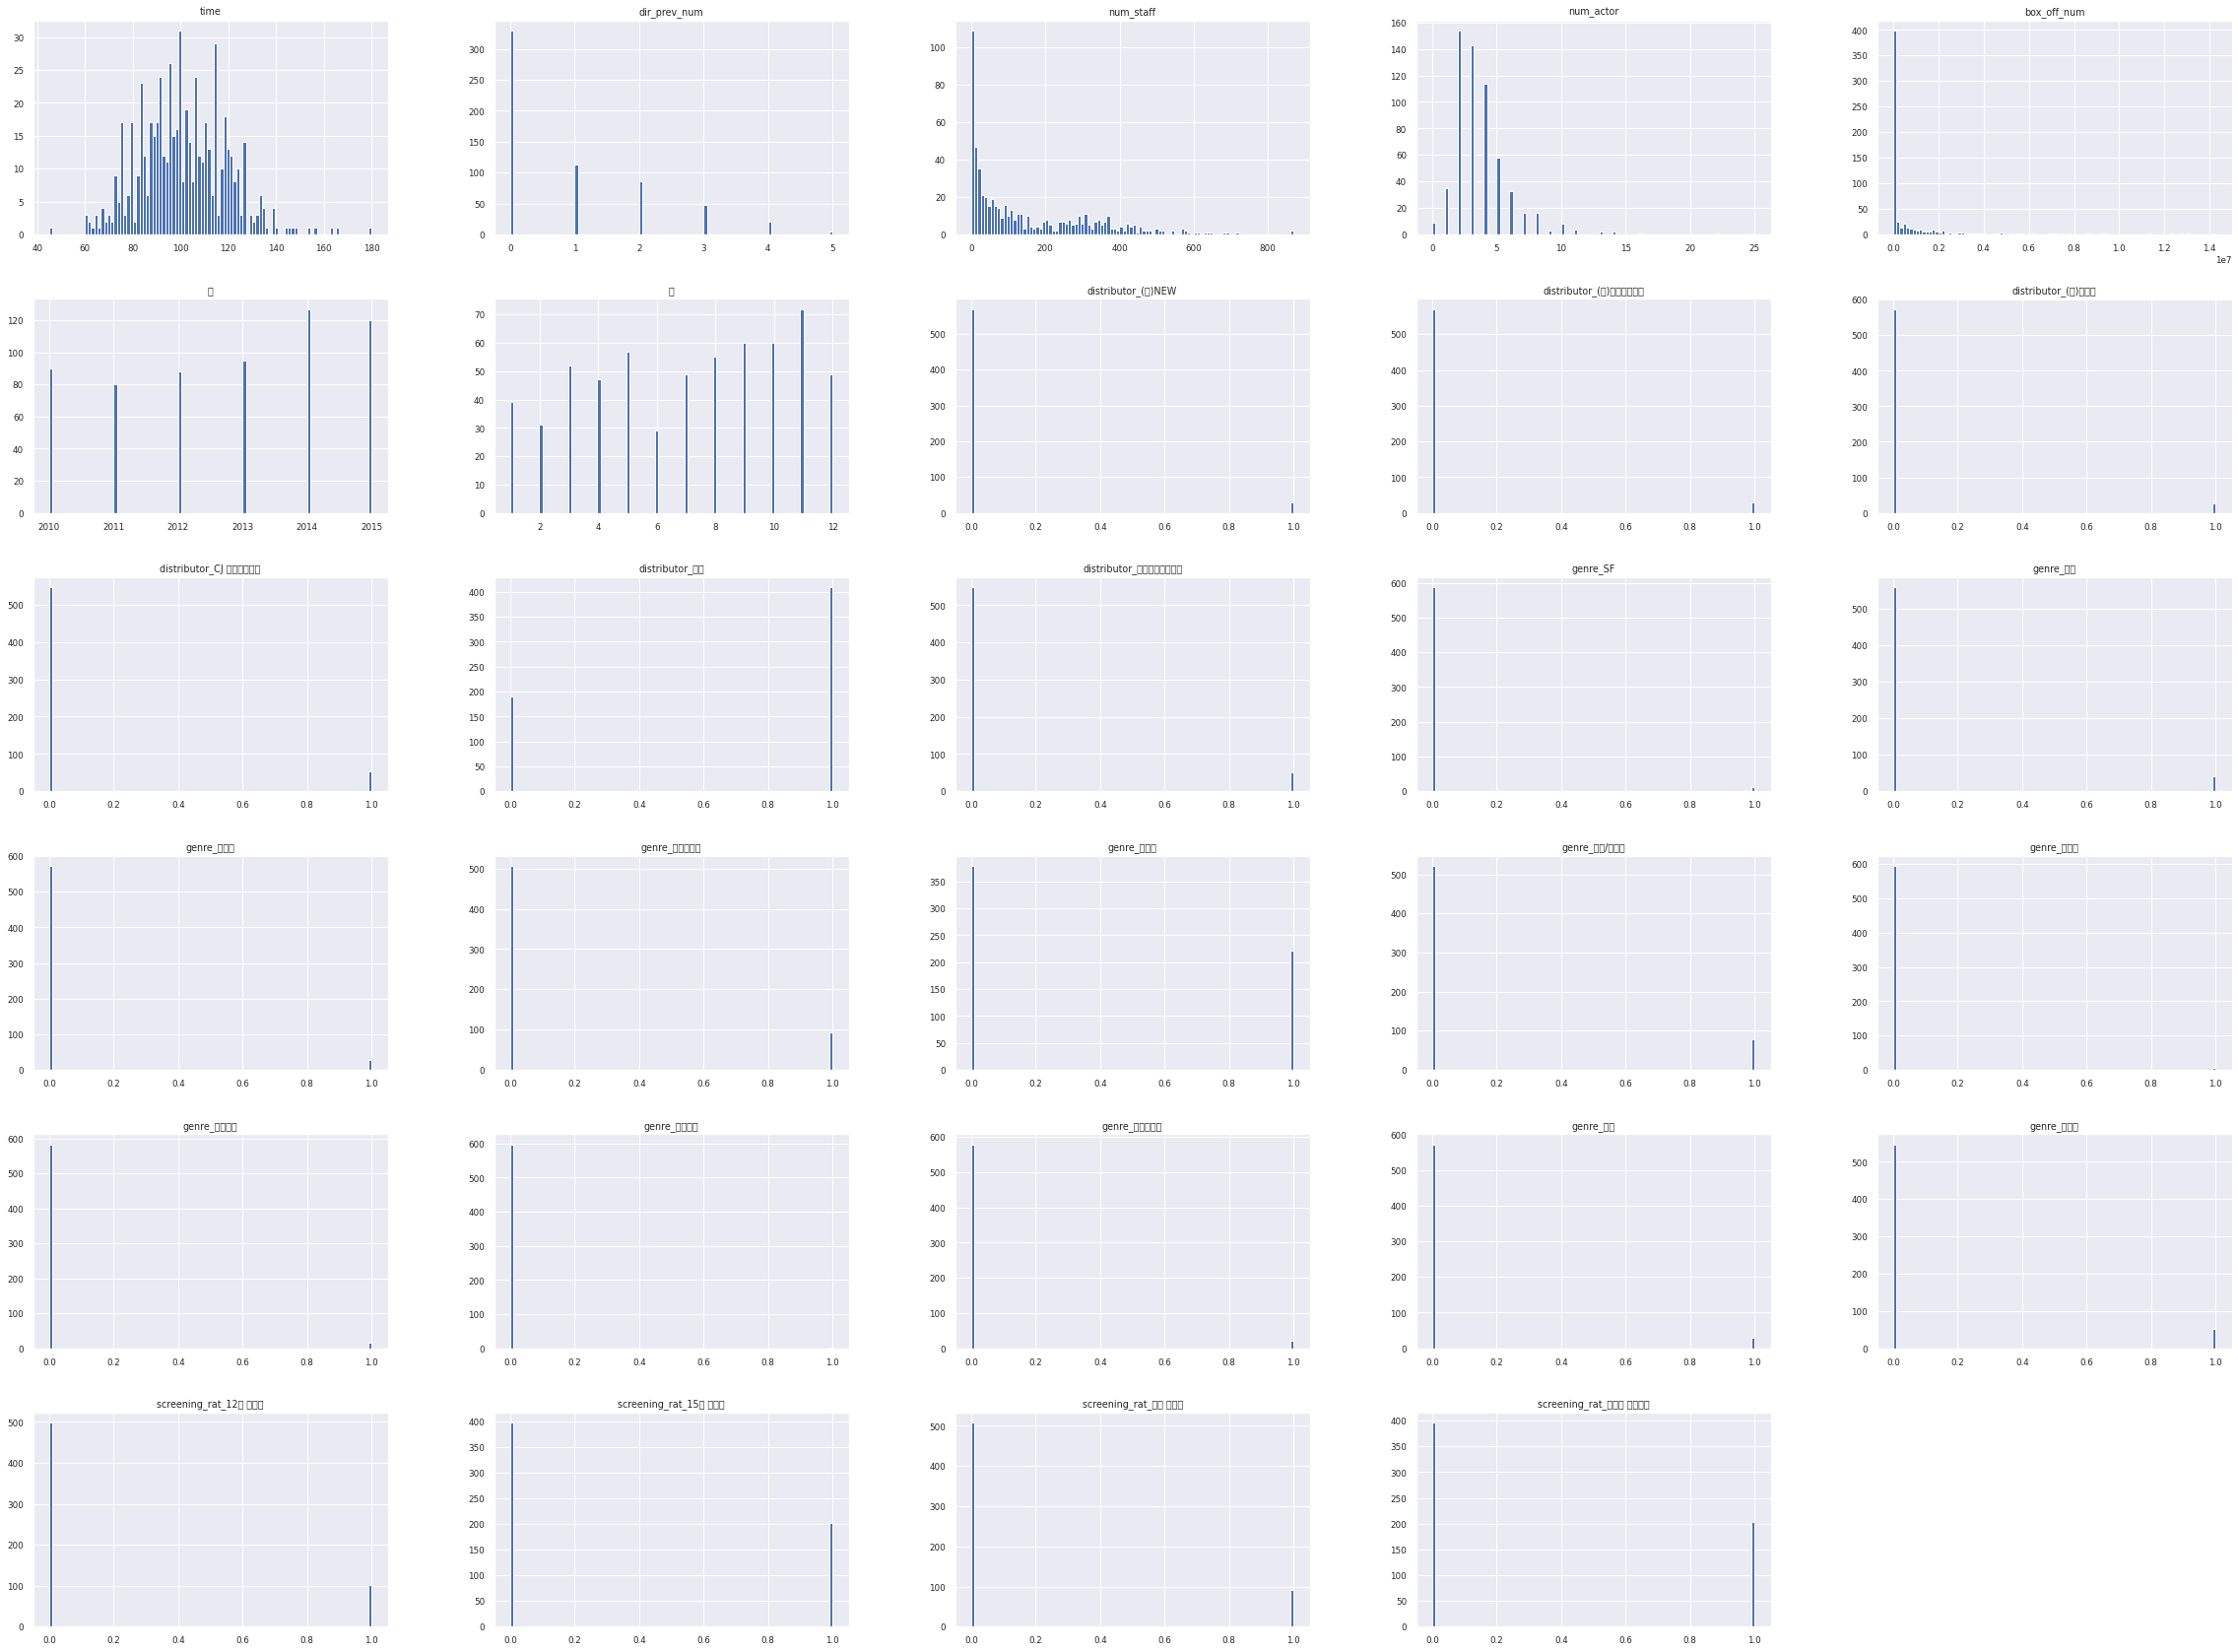

In [ ]:
import matplotlib.pyplot as plt

train.hist(bins = 100, figsize = (40,30))
plt.show()

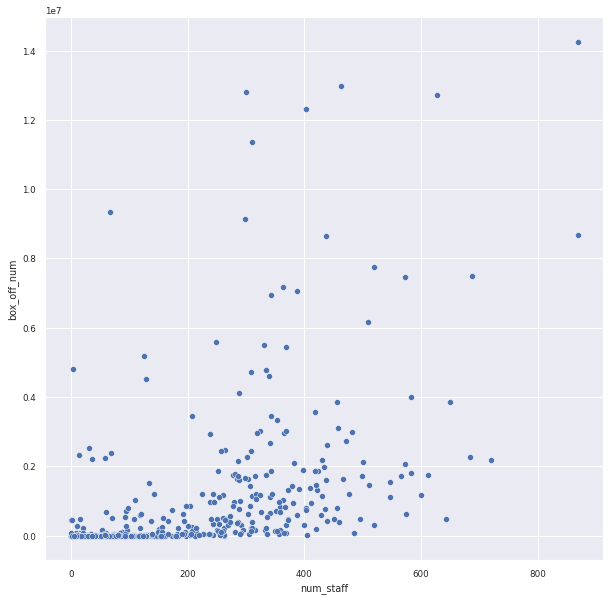

In [ ]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='num_staff', y = 'box_off_num')

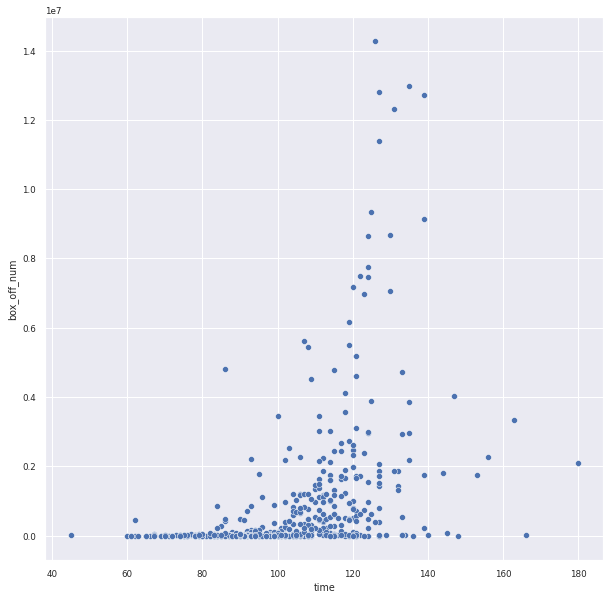

In [ ]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='time', y = 'box_off_num')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45712 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0,

<Figure size 720x720 with 0 Axes>

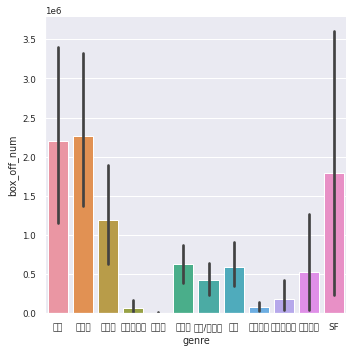

In [ ]:
#장르가 한글로 되어있어서 이거 영어로 바꾸면 확실하게 체크 가능할듯
plt.figure(figsize=[10,10])
sns.catplot(x='genre', y='box_off_num', kind='bar', data=data[data['TrainSplit']=='Train'])

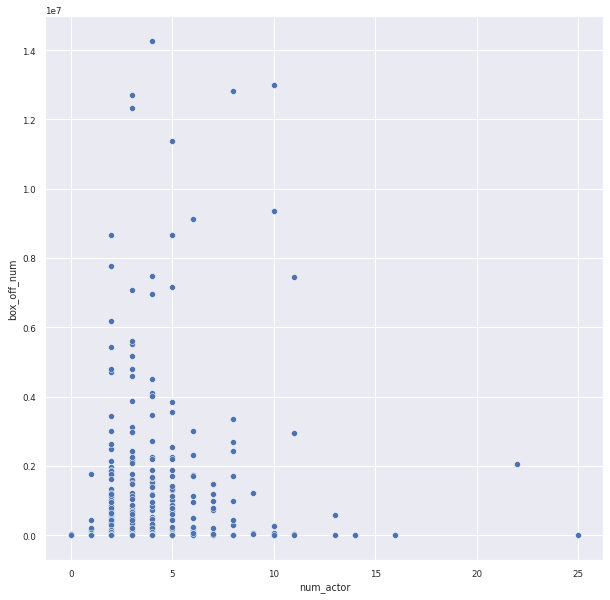

In [ ]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='num_actor', y = 'box_off_num')

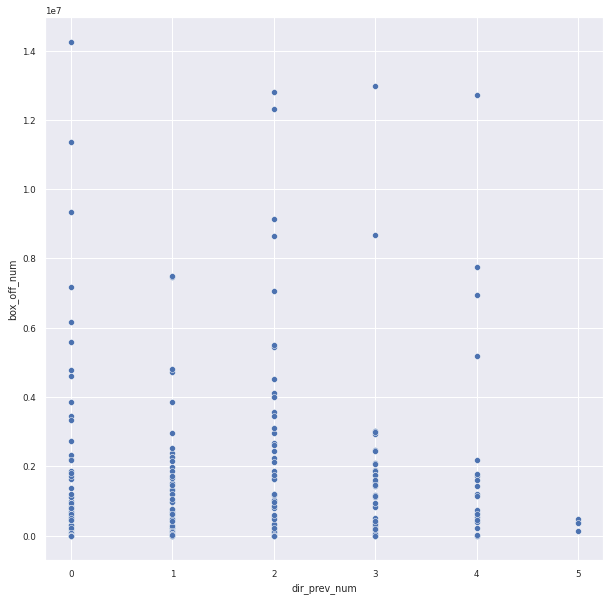

In [ ]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='dir_prev_num', y = 'box_off_num')

In [ ]:
#개봉일 가능하면 월별로 추려서 해도 좋을듯
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='release_time', y = 'box_off_num')

ValueError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
#전영화수는 그렇게 큰 의미는 없을 거 같기는 함. 써먹고 싶다면..?
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='screening_rat', y = 'box_off_num')

ValueError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
#이건 위에서 결측값 많아서 없애고 함
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='dir_prev_bfnum', y = 'box_off_num')

ValueError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
data['title'].unique()

#너무 많고 큰 의미가 없어보이므로 제거해도 될듯

array(['개들의 전쟁', '내부자들', '은밀하게 위대하게', '나는 공무원이다', '불량남녀',
       '강철대오 : 구국의 철가방', '길위에서', '회사원', '1789, 바스티유의 연인들', '청춘그루브',
       'AV 아이돌', '무서운 집', '해로', '짓', '철가방 우수氏', '자유의 언덕', '써니',
       '별이 빛나는 밤', '카트', '하하하', '두근두근 내 인생', '성실한 나라의 앨리스', '원령',
       '관능의 법칙', '안녕, 투이', '영도', '이웃집 좀비', '러브앤서울 복숭아마을 도색소동기', '무법자',
       '일탈여행 : 프라이빗 아일랜드', '로맨틱 헤븐', '겨울나비', '다이노 타임', '물 없는 바다',
       '오싹한 연애', '마이 페어 웨딩', '원나잇 온리', '일대일', '하늘의 황금마차', '러브픽션',
       '불타는 내 마음', '끝과 시작', '7월 32일', '청춘학당 : 풍기문란 보쌈 야사', '부당거래',
       '콘돌은 날아간다', '페어 러브', '극적인 하룻밤', '빅매치',
       '극장판 뛰뛰빵빵 구조대 미션: 둥둥이를 구하라!', '황구', '워킹걸',
       '나의 선택 - 잊혀진 가방 그 못다한 이야기', '에스엠타운 더 스테이지', '미조', '원더풀 라디오', '막걸스',
       '미궁: 비밀애', '파괴된 사나이', '친구 2', '              개를 훔치는 완벽한 방법',
       '청춘정담', '이방인들', '간첩', '그 참을 수 없는 맛', '도리화가', '의뢰인', '열정같은소리하고있네',
       '화끈한 써비스: 어느 잔인한 미용사의', '세상끝의 사랑', '어디로 갈까요?', '완전 소중한 사랑',
       '사물의 비밀', '청포도 사탕: 17년 전의 약속', '아저씨', '원 오브 어 카인드 3D', '사랑이 무서워',
       '검은손', '덕수리 5형제

In [ ]:
data['distributor'].unique()

#너무 많아서 앞에서 5개 제외 기타로 취급

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

In [ ]:
data['genre'].unique()

array(['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
       '애니메이션', '미스터리', 'SF'], dtype=object)

In [ ]:
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

KeyError: ignored